In [2]:
import matplotlib.pyplot as plt
from math import exp
from scipy.stats import norm
from scipy import stats
import seaborn as sns
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
plt.rcParams["figure.figsize"] = [10,5]
import warnings
warnings.filterwarnings("ignore")

In [3]:
df= pd.read_csv('nys_data.csv')

In [4]:
df.MIL_cat.value_counts()

Never Served    148699
Past Active       8677
Reserves          1684
Active             239
Name: MIL_cat, dtype: int64

In [5]:
df['MAR'].value_counts()

Married          80192
Never Married    50447
Divorced         14870
Widowed          10505
Separated         3285
Name: MAR, dtype: int64

In [6]:
df.RACES.value_counts()

White                  113737
Black                   19329
Asian                   13942
Other                    8179
More Than One Race       3473
American Indigenous       639
Name: RACES, dtype: int64

In [7]:
df['MIL_STAT'].value_counts()

Served    159299
Name: MIL_STAT, dtype: int64

In [8]:
df.head()

,Unnamed: 0,Unnamed: 0.1,SERIALNO,AGEP,CIT,DEYE,MAR,SEX,ANC,ANC1P,ANC2P,NATIVITY,RACAIAN,RACASN,RACBLK,RACNH,RACNUM,RACPI,RACSOR,DOUT_cat,FER_cat,INTP_cat,LANX_cat,MARHW_cat,MIL_cat,MLPA_cat,OIP_cat,RETP_cat,SCHG_cat,SCHL_cat,SEMP_cat,SSIP_cat,WKL_cat,WKW_cat,WRK_cat,YOEP_cat,DRIVESP_cat,ESR_cat,NAICSP_cat,POBP_cat,POWSP_cat,SCIENGRLP_cat,SOCP_cat,JWAP_mins,JWDP_mins,TOTAL_commute,RT_y,SPORDER_y,PUMA_y,ADJINC_y,PWGTP_y,CITWP,COW,DDRS,DEAR,DPHY,DREM,ENG,JWMNP,JWRIP,JWTR,MARHD,MARHM,MARHT,MARHYP,MIG,NWLK,PAP,RELP,SCH,SSP,WAGP,WKHP,DECADE,DIS,ESP,HISP,INDP,MIGSP,MSP,NOP,OC,OCCP,PERNP,PINCP,QTRBIR,RACWHT,RC,SCIENGP,VPS,WAOB,CIT_STATUS,BORN_CIT,HICOV,RACES,MIL_STAT,INDUSTRY
0,0,0,2018GQ0000012,26.0,5,2,Never Married,Female,1,26,999,2,0,0,0,0,1,0,0,No,No,0.0,Other_Lang,Unknown,Never Served,LT_17yrold,0.0,0.0,Graduate,Bachelors,0.0,0.0,LT1,LT_14wks,Not_Reported,Immigr_10s,No_Drive,Not_Labor,EDU,0,0,No,OFF3,0.0,0.0,0.0,P,1.0,3802,1013097,145.0,1.0,2.0,2.0,2,2.0,2.0,Very Well,201.0,0.0,14.0,3.0,3.0,3.0,1.0,1.0,4.0,0.0,17,3.0,0.0,5200.0,50.0,8.0,Not Disabled,0.0,1,EDU,36,6.0,0.0,0.0,5110.0,5200.0,5200.0,4,1,3.0,1.0,16.0,5,0,0,Insured,White,Served,Education
1,1,1,2018GQ0000040,21.0,1,2,Never Married,Male,1,51,999,1,0,0,0,0,1,0,0,No,Not_Applicable,0.0,English_Lang,Unknown,Never Served,LT_17yrold,0.0,0.0,Undergrad,Associates,0.0,0.0,LT1,14_26wks,Worked,Naturalized,No_Drive,Employed_at_work,ENT2,1,1,LT_Bachelors,EAT3,1425.0,1410.0,15.0,P,1.0,2702,1013097,43.0,0.0,1.0,2.0,2,2.0,2.0,Only English,2.0,0.0,10.0,3.0,3.0,3.0,1.0,3.0,4.0,0.0,17,2.0,0.0,1000.0,2.0,0.0,Not Disabled,0.0,1,ENT2,36,6.0,0.0,0.0,4110.0,1000.0,1000.0,2,1,3.0,0.0,16.0,1,1,1,Insured,White,Served,Entertainment
2,2,2,2018GQ0000060,18.0,2,2,Never Married,Female,1,275,999,1,0,0,0,0,1,0,1,No,No,0.0,Other_Lang,Unknown,Never Served,LT_17yrold,0.0,0.0,Undergrad,HS_Diploma,0.0,0.0,BT1_5,Not_Worked,Not_Worked,Immigr_00s,No_Drive,Not_Labor,ENT2,0,0,LT_Bachelors,SAL2,0.0,0.0,0.0,P,1.0,2001,1013097,88.0,0.0,1.0,2.0,2,2.0,2.0,Very Well,201.0,0.0,14.0,3.0,3.0,3.0,1.0,3.0,4.0,0.0,17,2.0,0.0,0.0,0.0,0.0,Not Disabled,0.0,2,ENT2,36,6.0,0.0,0.0,4720.0,0.0,0.0,3,0,3.0,0.0,16.0,2,1,1,Insured,Other,Served,Entertainment
3,3,3,2018GQ0000081,85.0,1,2,Widowed,Female,4,999,999,1,0,0,0,0,1,0,0,No,Not_Applicable,0.0,English_Lang,2.0,Never Served,LT_17yrold,0.0,0.0,Not_Attending,HS_Diploma,0.0,0.0,GT5,Not_Worked,Not_Reported,Naturalized,No_Drive,Not_Labor,No_Work,1,0,LT_Bachelors,No_Work,0.0,0.0,0.0,P,1.0,2401,1013097,109.0,0.0,10.0,1.0,1,1.0,1.0,Only English,201.0,0.0,14.0,2.0,2.0,2.0,1950.0,1.0,4.0,0.0,16,1.0,13700.0,0.0,0.0,0.0,Disabled,0.0,1,None,36,3.0,0.0,0.0,1.0,0.0,13700.0,3,1,3.0,0.0,16.0,1,1,1,Insured,White,Served,None
4,4,4,2018GQ0000103,19.0,1,2,Never Married,Female,2,50,425,1,0,0,0,0,1,0,0,No,No,0.0,English_Lang,Unknown,Never Served,LT_17yrold,0.0,0.0,Undergrad,NoDegree_College,0.0,0.0,LT1,14_26wks,Worked,Naturalized,5_6_driver,Employed_at_work,ENT1,1,1,LT_Bachelors,ENT2,915.0,910.0,5.0,P,1.0,1400,1013097,83.0,0.0,1.0,2.0,2,2.0,2.0,Only English,5.0,5.0,1.0,3.0,3.0,3.0,1.0,1.0,4.0,0.0,17,3.0,0.0,870.0,4.0,0.0,Not Disabled,0.0,1,ENT1,36,6.0,0.0,0.0,2723.0,870.0,870.0,4,1,3.0,0.0,16.0,1,1,1,Insured,White,Served,Entertainment


In [9]:
df.groupby(['DIS']).HICOV.value_counts()

DIS           HICOV      
Disabled      Insured         24345
              Not Insured       560
Not Disabled  Insured        126975
              Not Insured      7419
Name: HICOV, dtype: int64

In [10]:
df.SCHL_cat.value_counts()

HS_Diploma          35211
Bachelors           31360
NoDegree_College    19765
Masters             17841
Associates          14091
LT1_College          9351
GED_alt              6386
Professional         4334
Grade_12             3578
No_School            3364
Grade_11             2998
Doctorate            2414
Grade_10             2284
Grade_8              1743
Grade_9              1678
Grade_6              1084
Grade_7               529
Grade_5               516
Grade_3               273
Grade_4               242
Grade_2               106
Grade_1                75
Nursery                43
Kindergarten           33
Name: SCHL_cat, dtype: int64

In [11]:
df.SEX.value_counts()


Female    83483
Male      75816
Name: SEX, dtype: int64

In [12]:
df.ENG.value_counts()


Only English    118381
Very Well        22494
Well              9327
Not Well          6564
Not at All        2533
Name: ENG, dtype: int64

In [13]:
df.DIS.value_counts()
# 1 is with a disability

Not Disabled    134394
Disabled         24905
Name: DIS, dtype: int64

In [14]:
df.MIGSP.value_counts()
# 36 is nys
# 0 is havent moved or very young

36    159299
Name: MIGSP, dtype: int64

In [15]:
df.HICOV.value_counts()
# 1 is has health insurance
# major class imbalance

Insured        151320
Not Insured      7979
Name: HICOV, dtype: int64

In [16]:
df.MIL_cat.value_counts()

Never Served    148699
Past Active       8677
Reserves          1684
Active             239
Name: MIL_cat, dtype: int64

In [17]:
df.describe(include = 'all')

,Unnamed: 0,Unnamed: 0.1,SERIALNO,AGEP,CIT,DEYE,MAR,SEX,ANC,ANC1P,ANC2P,NATIVITY,RACAIAN,RACASN,RACBLK,RACNH,RACNUM,RACPI,RACSOR,DOUT_cat,FER_cat,INTP_cat,LANX_cat,MARHW_cat,MIL_cat,MLPA_cat,OIP_cat,RETP_cat,SCHG_cat,SCHL_cat,SEMP_cat,SSIP_cat,WKL_cat,WKW_cat,WRK_cat,YOEP_cat,DRIVESP_cat,ESR_cat,NAICSP_cat,POBP_cat,POWSP_cat,SCIENGRLP_cat,SOCP_cat,JWAP_mins,JWDP_mins,TOTAL_commute,RT_y,SPORDER_y,PUMA_y,ADJINC_y,PWGTP_y,CITWP,COW,DDRS,DEAR,DPHY,DREM,ENG,JWMNP,JWRIP,JWTR,MARHD,MARHM,MARHT,MARHYP,MIG,NWLK,PAP,RELP,SCH,SSP,WAGP,WKHP,DECADE,DIS,ESP,HISP,INDP,MIGSP,MSP,NOP,OC,OCCP,PERNP,PINCP,QTRBIR,RACWHT,RC,SCIENGP,VPS,WAOB,CIT_STATUS,BORN_CIT,HICOV,RACES,MIL_STAT,INDUSTRY
count,159299.000000,159299.000000,159299,159299.000000,159299.000000,159299.000000,159299,159299,159299.000000,159299.000000,159299.000000,159299.000000,159299.000000,159299.000000,159299.000000,159299.000000,159299.000000,159299.000000,159299.000000,159299,159299,159299.000000,159299,159299,159299,159299,159299.000000,159299.000000,159299,159299,159299.000000,159299.000000,159299,159299,159299,159299,159299,159299,159299,159299.000000,159299.000000,159299,159299,159299.000000,159299.000000,159299.000000,159299,159299.000000,159299.000000,159299.0,159299.000000,159299.000000,159299.000000,159299.000000,159299.000000,159299.000000,159299.000000,159299,159299.000000,159299.000000,159299.000000,159299.000000,159299.000000,159299.000000,159299.000000,159299.000000,159299.000000,159299.000000,159299.000000,159299.000000,159299.000000,159299.00000,159299.000000,159299.000000,159299,159299.0,159299.000000,159299,159299.0,159299.000000,159299.0,159299.0,159299.000000,1.592990e+05,1.592990e+05,159299.000000,159299.000000,159299.000000,159299.000000,159299.0,159299.000000,159299.000000,159299.000000,159299,159299,159299,159299
unique,NaN,NaN,85346,NaN,NaN,NaN,5,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,3,NaN,2,3,4,3,NaN,NaN,10,24,NaN,NaN,3,7,3,9,7,6,23,NaN,NaN,3,100,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,6,1,15
top,NaN,NaN,2018HU0333846,NaN,NaN,NaN,Married,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,Not_Applicable,NaN,English_Lang,2.0,Never Served,LT_17yrold,NaN,NaN,Not_Attending,HS_Diploma,NaN,NaN,LT1,50_52wks,Worked,Naturalized,No_Drive,Employed_at_work,No_Work,NaN,NaN,LT_Bachelors,No_Work,NaN,NaN,NaN,P,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Only English,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not Disabled,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Insured,White,Served,None
freq,NaN,NaN,18,NaN,NaN,NaN,80192,83483,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,147910,118355,NaN,118381,107917,148699,150383,NaN,NaN,143186,35211,NaN,NaN,102403,76757,83063,118679,101123,90763,49802,NaN,NaN,103350,44450,NaN,NaN,NaN,159299,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,118381,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,134394,NaN,NaN,44580,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,151320,113737,159299,44580
mean,79649.000000,97521.419086,NaN,49.615402,1.812058,1.973992,NaN,NaN,1.791512,436.851675,782.866471,1.231571,0.008437,0.095349,0.131081,0.000314,1.023842,0.001174,0.057420,NaN,NaN,2828.342614,NaN,NaN,NaN,NaN,658.146843,3223.731649,NaN,NaN,2165.644266,324.656778,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.600594,0.557480,NaN,NaN,293.964086,274.112989,20.411553,NaN,1.748021,2704.922580,1013097.0,97.185444,0.084056,4.309550,1.959159,1.959246,1.910282,1.943590,NaN,104.257949,0.423625,7.594084,2.310711,2.301822,2.310711,1360.767431,1.212136,3.926528,55.779258,2.763972,1.142863,3586.848568,35815.49780,24.315131,1.362325,NaN,0.0,1.863948,NaN,36.0,3.112122,0.0,0.0,2932.374014,3.798114e+04,4.865865e+04,2.507976,0.730092,0.188005,0.572132,16.0,1.722233,0.915944,0.768429,NaN,NaN,NaN,NaN
std,45985.804603,57322.686096,NaN,19.046934,1.437404,0.15915

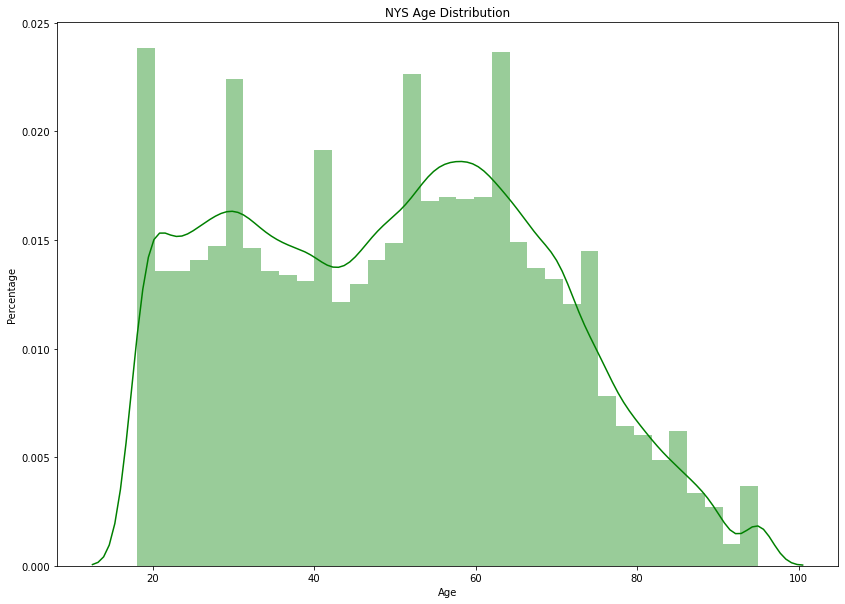

In [18]:
fig, ax = plt.subplots(figsize=(14,10))
sns.distplot(df['AGEP'], bins = 35, color = 'g')
ax.set_xlabel('Age')
ax.set_ylabel('Percentage')
ax.set_title('NYS Age Distribution')
plt.savefig('PNG/nys_age_di', bbox_inches = 'tight',pad_inches = 0);

In [19]:
from sklearn.preprocessing import StandardScaler

con_cols = ['WAGP','PAP','SSP','PERNP','PINCP']
scaler = StandardScaler()
df[con_cols] = scaler.fit_transform(df[con_cols])


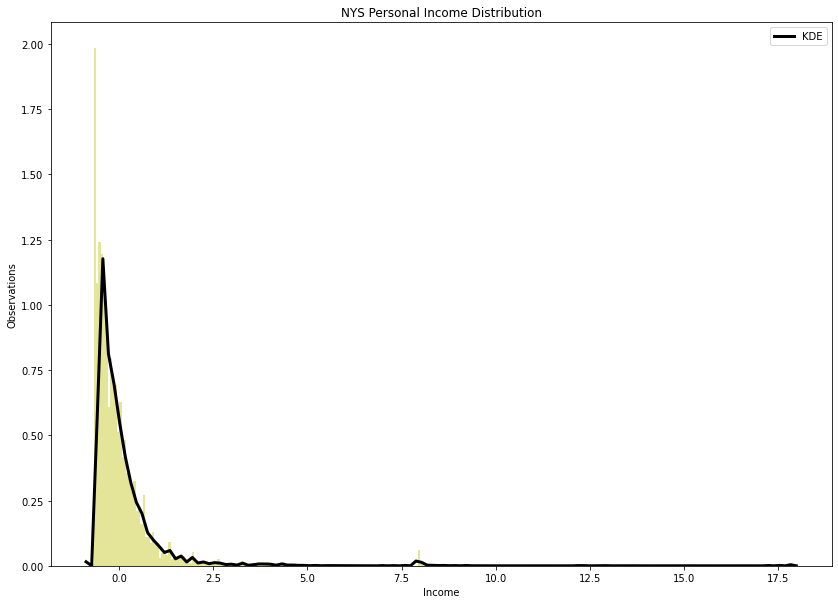

In [20]:
fig, ax = plt.subplots(figsize=(14,10))
sns.distplot(df['PINCP'], bins = 300, color = 'y',kde_kws={"color": "k", "lw": 3, "label": "KDE"})
ax.set_xlabel('Income')
ax.set_ylabel('Observations')
ax.set_title('NYS Personal Income Distribution')
plt.ticklabel_format(style='plain', axis='y')
plt.ticklabel_format(style='plain', axis='x')

plt.savefig('PNG/nys_inc_di', bbox_inches = 'tight',pad_inches = 0);

In [21]:
#df.PINCP.value_counts()

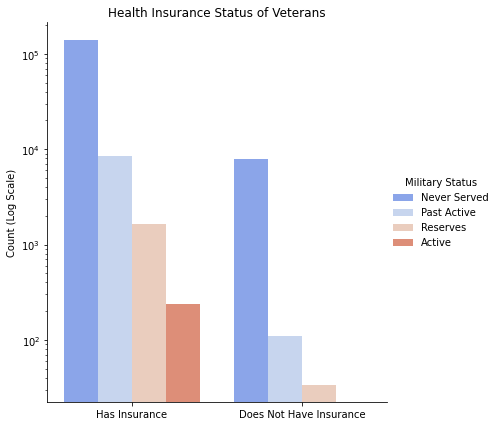

In [22]:
df2 = df.copy()
df2.rename(columns = {'MIL_cat':'Military Status'}, inplace = True) 
df1 = df2.groupby(['HICOV'])['Military Status'].value_counts()
df1 = df1.rename('Percentage').reset_index()

sns.catplot(x='HICOV' , y= 'Percentage', hue='Military Status', kind='bar', data= df1, height = 6, palette='coolwarm')
plt.title('Health Insurance Status of Veterans')
plt.xlabel('')

plt.ylabel('Count (Log Scale)')
plt.xticks([0,1],['Has Insurance','Does Not Have Insurance'])
plt.yscale('log')
plt.savefig('PNG/nys_mil_hi', bbox_inches = 'tight',pad_inches = 0);


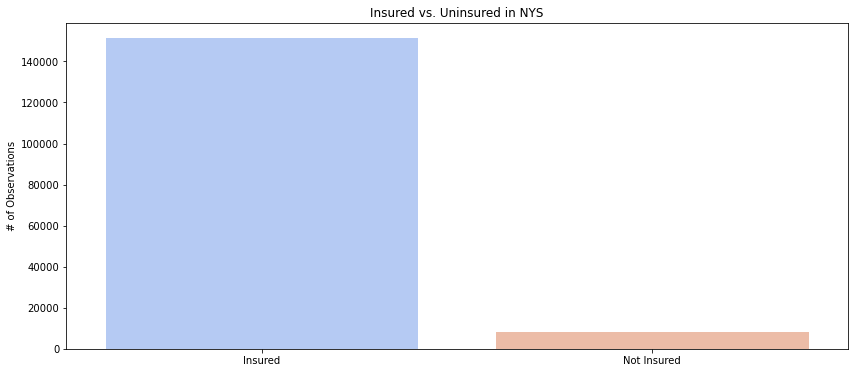

In [23]:

fig,ax = plt.subplots(figsize=(14,6))
sns.countplot(data = df, x = 'HICOV', palette = 'coolwarm')
ax.set_xlabel('')
ax.set_ylabel('# of Observations')
ax.set_title('Insured vs. Uninsured in NYS')
plt.savefig('PNG/ins_vs_not')#, bbox_inches = 'tight',pad_inches = 0);

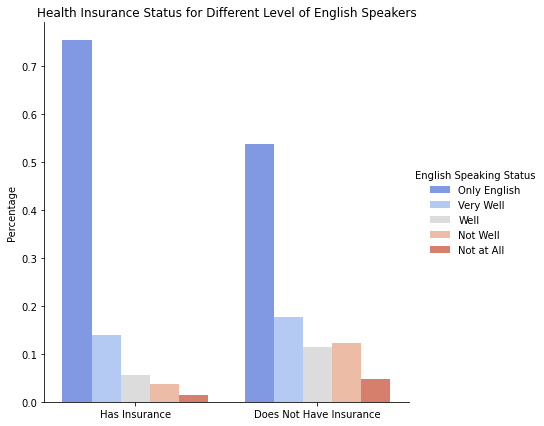

In [64]:
df1 = df.copy()
df1.rename(columns = {'ENG':'English Speaking Status'}, inplace = True) 
df1 = df1.groupby(['HICOV'])['English Speaking Status'].value_counts(normalize=True)
df1 = df1.rename('Percentage').reset_index()
sns.catplot(x='HICOV' , y= 'Percentage', hue='English Speaking Status', kind='bar', data= df1, height = 6, palette='coolwarm')
plt.title('Health Insurance Status for Different Level of English Speakers')
plt.xticks([0,1],['Has Insurance','Does Not Have Insurance'])
plt.xlabel('')
plt.savefig('PNG/nys_eng_hi', bbox_inches = 'tight',pad_inches = 0);

In [ ]:
len(df[df['AGEP'] < 17])

In [ ]:
len(df[(df['AGEP'] < 17) & (df['HICOV'] == 2)])